#### Richard Godfrey rg3030

Write a program that obtains the daily percentage change in the share price of each of these companies by sending a query to the the Yahoo finance API.

Generate a scatter plot of absolute value of percentage change against market capitalization. 

Are lower cap stocks more volatile according to this measure?

In [33]:
import matplotlib.pyplot as plt
import requests
import re
%matplotlib inline

In [2]:
pwd

'/Users/richardgodfrey/Code'

Questions / Plan :
    1. defining the API input
    how do i open the csv file "companies.csv"
    how do i create a dataframe of the csv matrix and strip out the info i need: str corresponding to "t" label
    how do i repeat for consectutive lines and tell it to stop at row count
    how do i create a list from this tickers=[ticker_val_1, ..., ticker_val_n] 
    how do i ensure or force ticker is a four digit string with no quotation marks
    
    2. passing to API
    how do i pass the tickers list to API
    how do i use requests.get with checksums for the pageload errors
    how do i call the API output (API_output.text or API_ouput.json() ) 
    how do i minimise the output for variables required (ticker, pcen change, market cap)
    how do i pass the output cleanly to a str
    
    3. working the API output
    how do i enter a string that contains double quote marks
    how do i clean the string (strip intial 5 and last 3 chars)
    how do i create a dict from that string
    how do i call the d.key() or dict_key label "t"
    how do i create a new list data=[vector of dict_key label "t", vector of dict_key label "cpfix", vector "mktcap"]
    how do i save the output_file as portfolio_prices.txt
    how do i make a plot of "cpfix" versus "mktcap" and label the plot with "t"
    how do i close both the files
    
    

Errors in API : server timeout/drops/buffering

Tried to use both Yahoo and Google - Google more stable in browser no success in Jupyter

In [10]:
# sample of API ouput

// [ { "id": "304466804484872" ,"t" : "GOOG" ,"e" : "NASDAQ" ,"l" : "699.56" ,"l_fix" : "699.56" ,"l_cur" : "699.56" ,"s": "2" ,"ltt":"4:00PM EST" ,"lt" : "Feb 24, 4:00PM EST" ,"lt_dts" : "2016-02-24T16:00:02Z" ,"c" : "+3.71" ,"c_fix" : "3.71" ,"cp" : "0.53" ,"cp_fix" : "0.53" ,"ccol" : "chg" ,"pcls_fix" : "695.85" ,"el": "701.73" ,"el_fix": "701.73" ,"el_cur": "701.73" ,"elt" : "Feb 24, 7:58PM EST" ,"ec" : "+2.17" ,"ec_fix" : "2.17" ,"ecp" : "0.31" ,"ecp_fix" : "0.31" ,"eccol" : "chg" ,"div" : "" ,"yld" : "" } ,{ "id": "658890" ,"t" : "YHOO" ,"e" : "NASDAQ" ,"l" : "30.95" ,"l_fix" : "30.95" ,"l_cur" : "30.95" ,"s": "2" ,"ltt":"4:00PM EST" ,"lt" : "Feb 24, 4:00PM EST" ,"lt_dts" : "2016-02-24T16:00:02Z" ,"c" : "+0.28" ,"c_fix" : "0.28" ,"cp" : "0.91" ,"cp_fix" : "0.91" ,"ccol" : "chg" ,"pcls_fix" : "30.67" ,"el": "31.02" ,"el_fix": "31.02" ,"el_cur": "31.02" ,"elt" : "Feb 24, 5:30PM EST" ,"ec" : "+0.07" ,"ec_fix" : "0.07" ,"ecp" : "0.23" ,"ecp_fix" : "0.23" ,"eccol" : "chg" ,"div" : "" ,"yld" : "" } ]

input = // [ { "id": "304466804484872" ,"t" : "GOOG" ,"e" : "NASDAQ" ,"l" : "699.56" ,"l_fix" : "699.56" ,"l_cur" : "699.56" ,"s": "2" ,"ltt":"4:00PM EST" ,"lt" : "Feb 24, 4:00PM EST" ,"lt_dts" : "2016-02-24T16:00:02Z" ,"c" : "+3.71" ,"c_fix" : "3.71" ,"cp" : "0.53" ,"cp_fix" : "0.53" ,"ccol" : "chg" ,"pcls_fix" : "695.85" ,"el": "701.73" ,"el_fix": "701.73" ,"el_cur": "701.73" ,"elt" : "Feb 24, 7:58PM EST" ,"ec" : "+2.17" ,"ec_fix" : "2.17" ,"ecp" : "0.31" ,"ecp_fix" : "0.31" ,"eccol" : "chg" ,"div" : "" ,"yld" : "" } ,{ "id": "658890" ,"t" : "YHOO" ,"e" : "NASDAQ" ,"l" : "30.95" ,"l_fix" : "30.95" ,"l_cur" : "30.95" ,"s": "2" ,"ltt":"4:00PM EST" ,"lt" : "Feb 24, 4:00PM EST" ,"lt_dts" : "2016-02-24T16:00:02Z" ,"c" : "+0.28" ,"c_fix" : "0.28" ,"cp" : "0.91" ,"cp_fix" : "0.91" ,"ccol" : "chg" ,"pcls_fix" : "30.67" ,"el": "31.02" ,"el_fix": "31.02" ,"el_cur": "31.02" ,"elt" : "Feb 24, 5:30PM EST" ,"ec" : "+0.07" ,"ec_fix" : "0.07" ,"ecp" : "0.23" ,"ecp_fix" : "0.23" ,"eccol" : "chg" ,"div" : "" ,"yld" : "" } ]

# call it input and correct errors due to doublequotes in string, leading and trailing chars

SyntaxError: invalid syntax (<ipython-input-10-2c01270c88cf>, line 1)

In [16]:
input_test = "{, "id":, "304466804484872", ,"t", :, "GOOG", ,"e", :, "NASDAQ",}"

SyntaxError: invalid syntax (<ipython-input-16-231352d88e7b>, line 1)

In [13]:

# tidy the input from API

# method 1
my_string = my_string.rstrip('\\')

# method 2
if string[-1] == '\\':
    string = string[:-1]

# method 3
# s.replace('/', '')
input = input.replace('/'&'['&']', '')
input = re.split('"', input)

d = dict(input)


AttributeError: 'function' object has no attribute 'replace'

In [3]:
import matplotlib.pyplot as plt
import requests
import re

f = open('company_list.csv','r')

f.__next__()

# call Yahoo API
http://finance.yahoo.com/d/quotes.csv?s=AAPL+GOOG+MSFT&f=snabp
    # s stock code; n name; a ask; b bid; p prev close; k2 rt%change, p2 %change
    



SyntaxError: invalid syntax (<ipython-input-3-2eea469bb6e0>, line 10)

In [8]:

r = requests.get('http://finance.yahoo.com/d/quotes.csv?s=AAPL&f=snabp')
r.status_code
r.text
r.json()
    
  
    
>>> r = requests.get('https://api.github.com/user', auth=('user', 'pass'))
>>> r.status_code
200
>>> r.headers['content-type']
'application/json; charset=utf8'
>>> r.encoding
'utf-8'
>>> r.text
u'{"type":"User"...'
>>> r.json()
{u'private_gists': 419, u'total_private_repos': 77, ...}
    
    

SyntaxError: invalid syntax (<ipython-input-8-228c87aab1d2>, line 9)

In [9]:
r = requests.get('http://finance.yahoo.com/d/quotes.csv?s=AAPL&f=snabp')
r.status_code

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))

In [7]:
r = requests.get('https://api.github.com', auth=('richardjgo', ))
r.status_code


200

In [15]:
r.text

'{"current_user_url":"https://api.github.com/user","current_user_authorizations_html_url":"https://github.com/settings/connections/applications{/client_id}","authorizations_url":"https://api.github.com/authorizations","code_search_url":"https://api.github.com/search/code?q={query}{&page,per_page,sort,order}","emails_url":"https://api.github.com/user/emails","emojis_url":"https://api.github.com/emojis","events_url":"https://api.github.com/events","feeds_url":"https://api.github.com/feeds","followers_url":"https://api.github.com/user/followers","following_url":"https://api.github.com/user/following{/target}","gists_url":"https://api.github.com/gists{/gist_id}","hub_url":"https://api.github.com/hub","issue_search_url":"https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}","issues_url":"https://api.github.com/issues","keys_url":"https://api.github.com/user/keys","notifications_url":"https://api.github.com/notifications","organization_repositories_url":"https://api.gith

In [16]:
r.json()

{'authorizations_url': 'https://api.github.com/authorizations',
 'code_search_url': 'https://api.github.com/search/code?q={query}{&page,per_page,sort,order}',
 'current_user_authorizations_html_url': 'https://github.com/settings/connections/applications{/client_id}',
 'current_user_repositories_url': 'https://api.github.com/user/repos{?type,page,per_page,sort}',
 'current_user_url': 'https://api.github.com/user',
 'emails_url': 'https://api.github.com/user/emails',
 'emojis_url': 'https://api.github.com/emojis',
 'events_url': 'https://api.github.com/events',
 'feeds_url': 'https://api.github.com/feeds',
 'followers_url': 'https://api.github.com/user/followers',
 'following_url': 'https://api.github.com/user/following{/target}',
 'gists_url': 'https://api.github.com/gists{/gist_id}',
 'hub_url': 'https://api.github.com/hub',
 'issue_search_url': 'https://api.github.com/search/issues?q={query}{&page,per_page,sort,order}',
 'issues_url': 'https://api.github.com/issues',
 'keys_url': 'htt

In [11]:
g = requests.get('http://finance.google.com/finance/info?client=ig&q=NASDAQ:GOOG')
g.status

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))

3. Working the API output


In [36]:
data = {'title': 'AAPL', 'cpfix': 0.02, 'mktcap': 2345, 'title': 'GGLE'}

In [51]:
data['title'] # picks last option of 'title'

'GGLE'

In [49]:
names = ['AAPL', 'BBUY']
percentchange = [0.021, -0.005]
data_dict = dict(zip(names, percentchange))
data_dict.keys()

dict_keys(['AAPL', 'BBUY'])

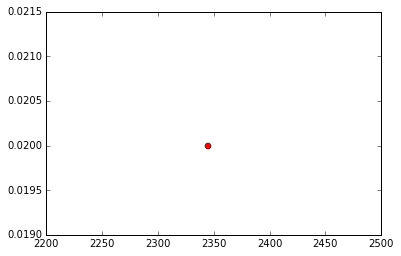

In [35]:
plt.plot(data['mktcap'],data['cpfix'], 'ro')